<a href="https://colab.research.google.com/github/nicholauscjj/laughingcouscous/blob/main/Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/nicholauscjj/laughingcouscous.git -q

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras import optimizers
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('/content/laughingcouscous/EmployeeSatisfactionIndex.csv')
df.columns = df.columns.str.lower()
# df = df.drop(columns=['no'])
df

,age,dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,49,HR,Suburb,PG,On-Campus,2,5,0,6,0,29805,1
496,24,Technology,Suburb,UG,Referral,2,4,0,2,0,29805,0
497,34,Marketing,City,PG,On-Campus,1,3,0,2,0,24076,1
498,26,Technology,City,UG,On-Campus,2,1,1,1,1,29805,0


In [ ]:
X_data = df.iloc[:,:-1]
y_label = df.iloc[:,-1:]

In [ ]:
categorical_column = ['dept', 'recruitment_type', 'location', 'education']

In [ ]:
OHE_data = pd.get_dummies(X_data, columns=categorical_column, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(OHE_data, y_label, test_size=0.2, random_state=42069, stratify=y_label)

In [ ]:
def normalize_me(df):
  return (df-df.min())/(df.max()-df.min())

In [ ]:
X_train_scaled = normalize_me(X_train)
X_test_scaled = normalize_me(X_test)

In [ ]:
y_train = y_train.to_numpy().flatten()
y_test = y_test.to_numpy().flatten()

In [ ]:
keras.backend.clear_session()

In [ ]:
model_huge = keras.Sequential(
    [
        Input(shape=(X_train_scaled.shape[1],)),
        layers.Dense(48, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ]
)

model_small = keras.Sequential(
    [
        Input(shape=(X_train_scaled.shape[1],)),
        layers.Dense(6, activation='relu'),
        layers.Dense(3, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ]
)

In [ ]:
opt_arr = ['sgd','adam']
size_arr = ['huge','small']
lr_arr = [0.01, 0.001]
epoch_arr = [250, 500]

result_arr = []

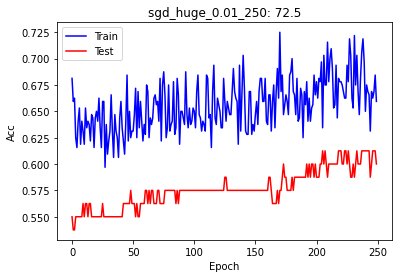

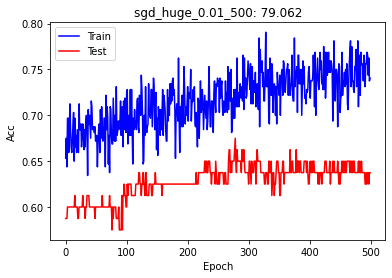

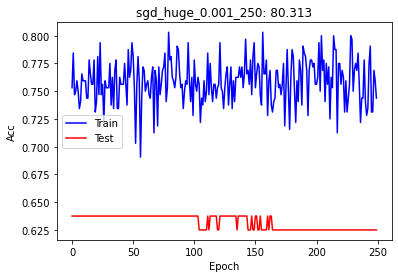

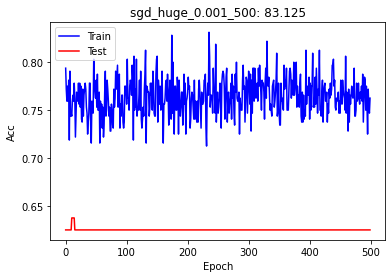

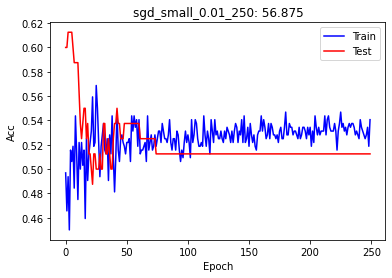

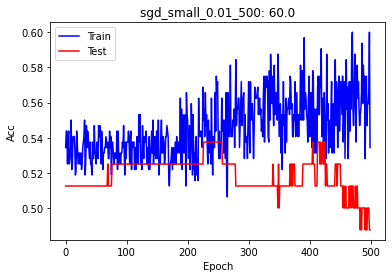

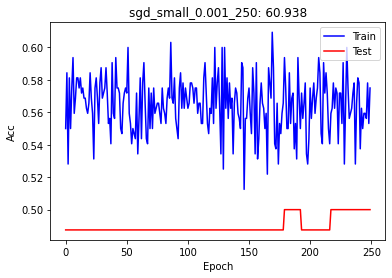

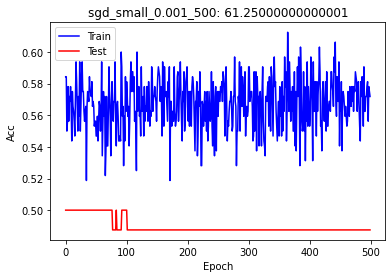

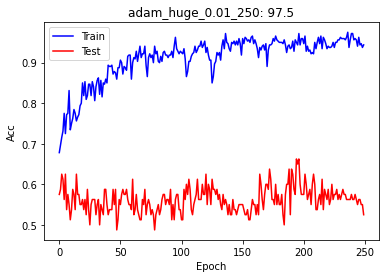

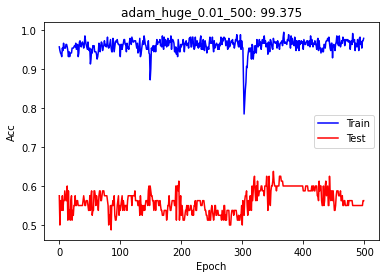

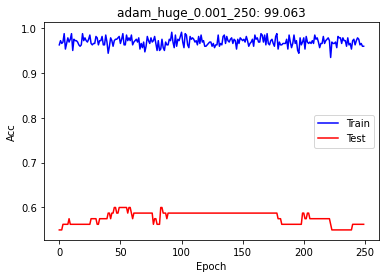

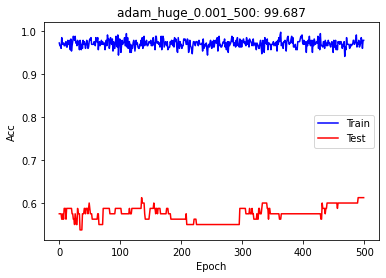

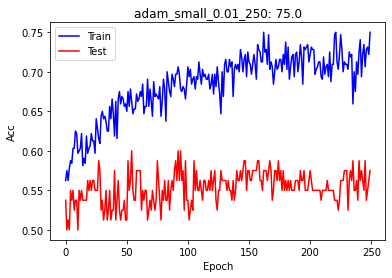

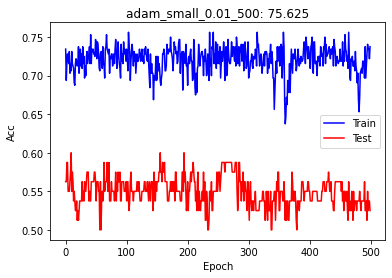

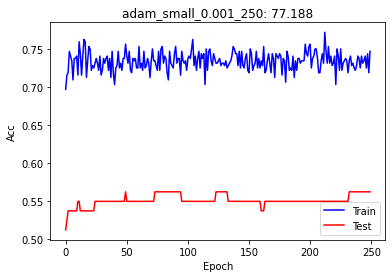

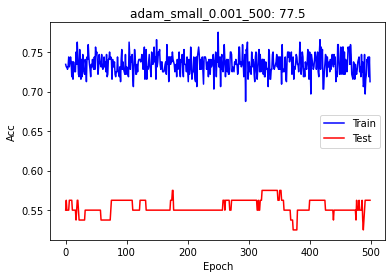

In [ ]:
for opt in opt_arr:
  for size in size_arr:
    for lr in lr_arr:
      for epoch in epoch_arr:
        if opt=='sgd':
          opt_select = optimizers.SGD(lr)
        elif opt=='adam':
          opt_select = optimizers.Adam(lr)
        
        if size=='huge':
          model_huge.compile(optimizer=opt_select, loss='binary_crossentropy', metrics='binary_accuracy')
          history = model_huge.fit(X_train_scaled, y_train, batch_size=32, epochs=epoch, validation_split=0.2, verbose=0)
        elif size=='small':
          model_small.compile(optimizer=opt_select, loss='binary_crossentropy', metrics='binary_accuracy')
          history = model_small.fit(X_train_scaled, y_train, batch_size=32, epochs=epoch, validation_split=0.2, verbose=0)
        
        max_score = np.array(history.history['binary_accuracy']).max().round(5)*100
        str_title = opt + '_' + size + '_' + str(lr) + '_' + str(epoch) + ': '+ str(max_score)
        
        plt.plot(history.history['binary_accuracy'], label='Train', color='b')
        plt.plot(history.history['val_binary_accuracy'], label='Dev', color='r')

        plt.legend(['Train','Test'])
        plt.xlabel('Epoch') 
        plt.ylabel('Acc')
        plt.title(str_title)

        plt.savefig(str_title+'.png')
        plt.show()

        result_arr.append([opt, size, lr, epoch, max_score])

In [ ]:
df = pd.DataFrame(result_arr, columns = ['Optimizer','No. of Hidden Layers','Learning Rate', 'No. of Epochs', 'Max Training Acc'])

   Optimizer No. of Hidden Layers  ...  No. of Epochs  Max Training Acc
0        sgd                 huge  ...            250            72.500
1        sgd                 huge  ...            500            79.062
2        sgd                 huge  ...            250            80.313
3        sgd                 huge  ...            500            83.125
4        sgd                small  ...            250            56.875
5        sgd                small  ...            500            60.000
6        sgd                small  ...            250            60.938
7        sgd                small  ...            500            61.250
8       adam                 huge  ...            250            97.500
9       adam                 huge  ...            500            99.375
10      adam                 huge  ...            250            99.063
11      adam                 huge  ...            500            99.687
12      adam                small  ...            250           

In [ ]:
compression_opts = dict(method='zip', archive_name='out.csv')  
df.to_csv('out.zip', index=False, compression=compression_opts)  

In [ ]:
import os
import shutil
import re

In [ ]:
os.mkdir('outpic')

In [ ]:
for root, subFolders, files in os.walk('/content'):
  for x in files:
    if re.search('.png', x.lower()):
      shutil.move(os.path.join(root, x), '/content/outpic')

In [ ]:
!zip -r /content/outpic.zip /content/outpic